In [42]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import LogFormatter
import numpy as np
# Set Times New Roman as the default font
plt.rcParams['font.family'] = 'Times New Roman'

In [43]:
def plot_scores_with_error_bars(
    x,
    y,
    yerr,
    xlabel=None,
    ylabel='Pokie Score',
    table_number=None,
    title=None,
    xtick_labels=None,
    xtick_rotation=0,
    requested=False,
    LR=False,
    bbox_x=1.02,
    bbox_y=0.72,
    fig_size_x=10,
    fig_size_y=5
):
    plt.figure(figsize=(8, 5))

    # Main error bar plot with tuned marker size
    plt.errorbar(
        x, y, yerr=yerr, fmt='o', capsize=10, color='blue',
        markersize=12, label=f'{ylabel} (68% CI)'
    )

    # Horizontal reference lines
    plt.axhline(2/3, color='red', linestyle='--', label='Well Calibrated')
    plt.axhline(1/2, color='orange', linestyle='--', label='Poorly Calibrated')

    # Font size tuning
    plt.title(title, fontsize=28)
    plt.xlabel(xlabel, fontsize=28)
    plt.ylabel(ylabel, fontsize=28)
    plt.xticks(fontsize=21)
    plt.yticks(fontsize=21)

    # Custom x-tick labels
    if LR:
        plt.xscale('log')  # Log spacing for better visual separation
        plt.xticks(ticks=x, labels=xtick_labels, rotation=45, fontsize=21)
    elif xtick_labels:
            plt.xticks(ticks=x, labels=xtick_labels, rotation=xtick_rotation, fontsize=21)

    if requested:
        plt.xlim(-0.3, len(x) - 0.7)

    # Legend styling
    plt.legend(loc='upper right', fontsize=18)
    plt.tight_layout()

    # Save with table_number if provided
    filename_prefix = f'{table_number}_plot' if table_number else 'plot'
    plt.savefig(f'./PNG_Plots/{filename_prefix}.png', dpi=300)
    plt.savefig(f'./PDF_Plots/{filename_prefix}.pdf')

    plt.show()

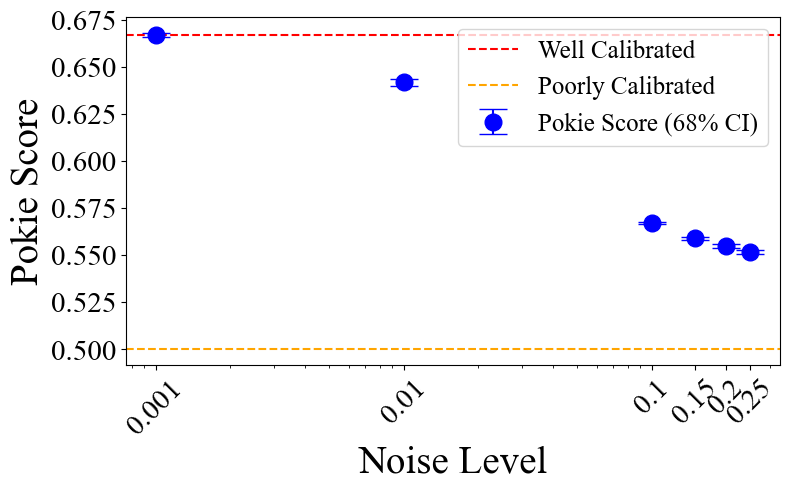

In [44]:
# Table 1
noise_levels = [0.001, 0.010, 0.100, 0.150, 0.200, 0.250]
scores = [0.6670, 0.6417, 0.5669, 0.5589, 0.5548, 0.5517]
errors = [0.0011, 0.0020, 0.0005, 0.0009, 0.0009, 0.0009]

plot_scores_with_error_bars(
    x=noise_levels,
    y=scores,
    yerr=errors,
    xtick_labels=['0.001', '0.01', '0.1', '0.15', '0.2', '0.25'],  # <- manually override
    xtick_rotation=45,
    xlabel='Noise Level',
    ylabel='Pokie Score',
    table_number='Table_1',
    LR=True,
)

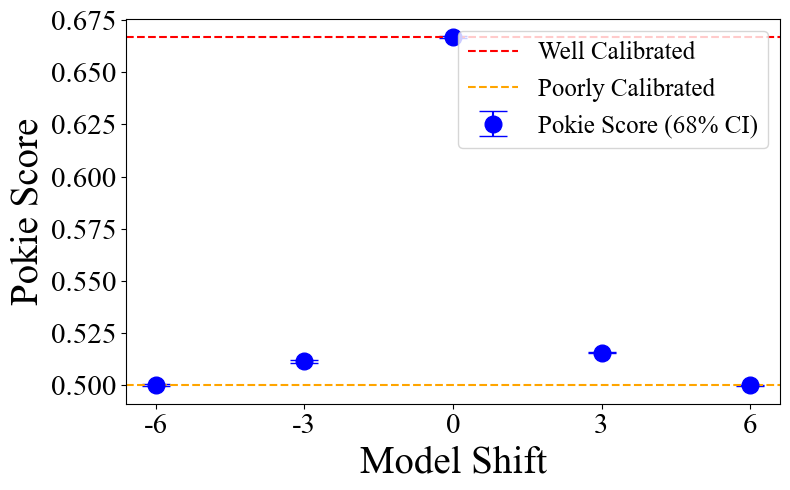

In [45]:
# Table GMM Results
model_shifts = [-6, -3, 0, 3, 6]
scores = [0.5002, 0.5115, 0.6669, 0.5156, 0.5000]
errors = [0.0003, 0.0006, 0.0003, 0.0003, 0.0004]

plot_scores_with_error_bars(
    x=model_shifts,
    y=scores,
    yerr=errors,
    xtick_labels=model_shifts,
    xlabel='Model Shift',
    ylabel='Pokie Score',
    table_number='Table_GMM',
    bbox_x = 1.02,
    bbox_y = 0.90
    # title='Pokie Score vs Model Shift'
)

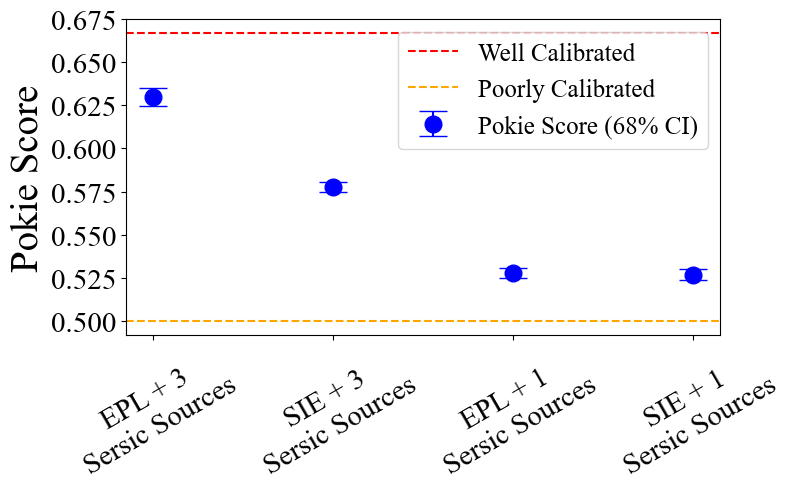

In [46]:
# Data from the Lens Results Condensed table --> Need to fix (x tick labels are messing with the plot)
models = [
    "EPL + 3\nSersic Sources",
    "SIE + 3\nSersic Sources",
    "EPL + 1\nSersic Sources",
    "SIE + 1\nSersic Sources"
]
scores = [0.6297, 0.5777, 0.5277, 0.5267]
errors = [0.0054, 0.0027, 0.0028, 0.0031]

plot_scores_with_error_bars(
    x=range(len(models)),  # Use index for x-axis
    y=scores,
    yerr=errors,
    # xlabel='Lens Model and Number of Sources',
    ylabel='Pokie Score',
    xtick_labels=models,
    xtick_rotation=30,
    table_number='Model_Misspecification',
    # title='Pokie Score vs Lens Model and Number of Sources'
)

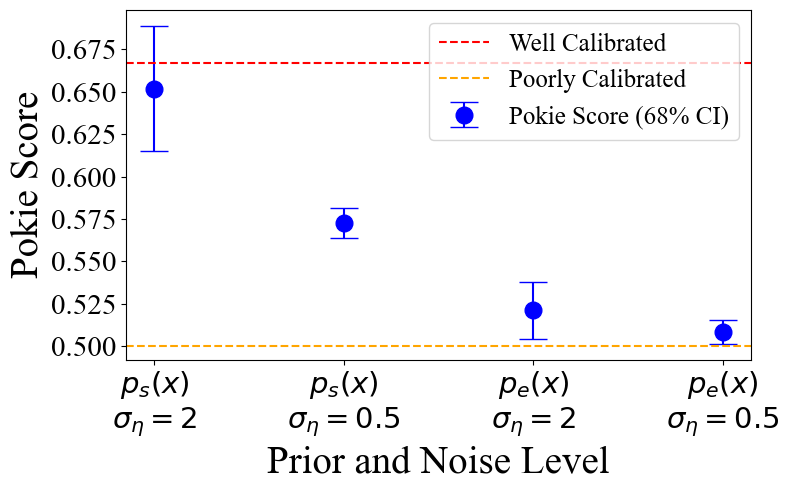

In [47]:
# Table Lensed_Images_Results 
conditions = [
    r"$p_s(x)$" + "\n" + r"$\sigma_{\eta}=2$",
    r"$p_s(x)$" + "\n" + r"$\sigma_{\eta}=0.5$",
    r"$p_e(x)$" + "\n" + r"$\sigma_{\eta}=2$",
    r"$p_e(x)$" + "\n" + r"$\sigma_{\eta}=0.5$"
]
scores = [0.6518, 0.5728, 0.5214, 0.5085]
errors = [0.0369, 0.0089, 0.0168, 0.0069]

plot_scores_with_error_bars(
    x=range(len(conditions)),  # Use index for x-axis
    y=scores,
    yerr=errors,
    xlabel='Prior and Noise Level',
    ylabel='Pokie Score',
    xtick_labels=conditions,
    xtick_rotation=0,
    table_number='Table_Lensed_Images',
    bbox_x = 1.02,
    bbox_y = 0.87,
    # title='Pokie Score vs Prior and Noise Level'
)

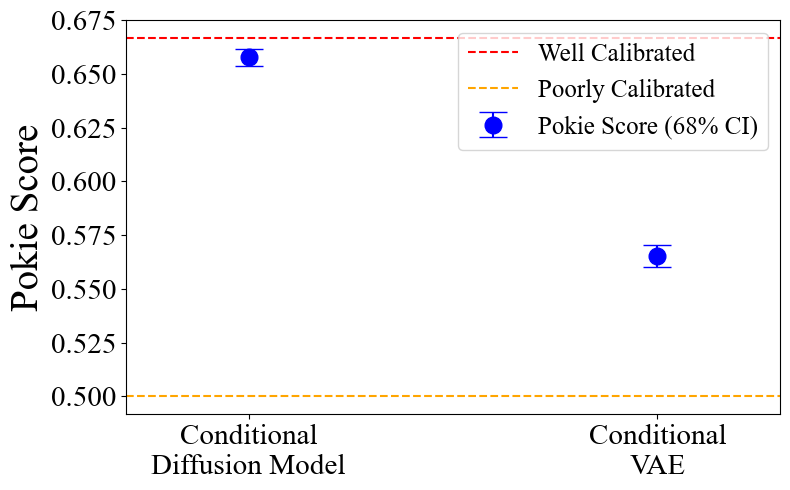

In [48]:
# Table Conditional Distribution Results
models = ["Conditional\nDiffusion Model", "Conditional\nVAE"]
# scores = [0.5653, 0.6576]
# errors = [0.0052, 0.0040]

scores = [0.6576, 0.5653] 
errors = [0.0040, 0.0052]

plot_scores_with_error_bars(
    x=range(len(models)),  # Use index for x-axis
    y=scores,
    yerr=errors,
    # xlabel='Model',
    ylabel='Pokie Score',
    xtick_labels=models,
    xtick_rotation=0,
    table_number='Table_Cond_Dist',
    requested=True,
)

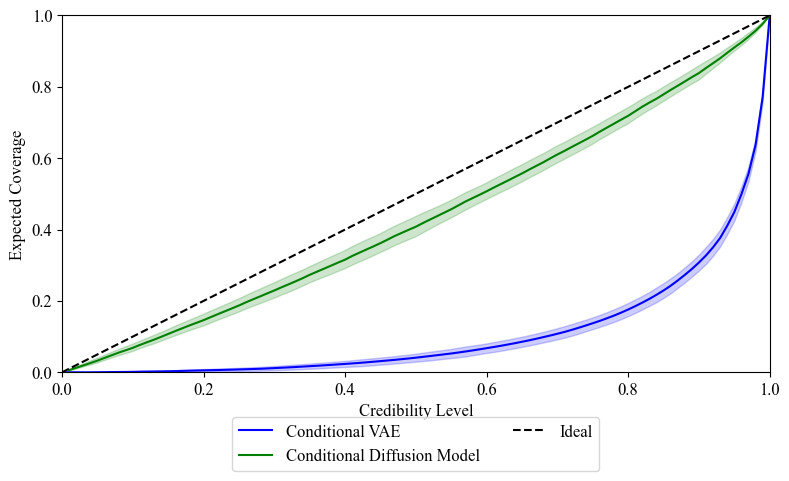

In [49]:
# Load in Tarp_Result_Averaged_Data.npz from /~/Downloads/TARP Plots Conditional Model/
tarp_data = np.load('/Users/sammysharief/Downloads/TARP Plots Conditional Model/Tarp_Result_Averaged_Data.npz')
methods = ['conditional VAE\n', 'conditional Diffusion Model\n']
k_sigma = [3]

# Define common alpha grid (101 points between 0 and 1)
common_alpha = np.linspace(0, 1, 101)
common_alpha_ext = np.insert(common_alpha, 0, 0.0)
cvae_mean_ecp = tarp_data['cvae_mean_ecp']
cvae_std_ecp = tarp_data['cvae_std_ecp']
alpha = tarp_data['common_alpha']
cdm_mean_ecp = tarp_data['cdm_mean_ecp']
cdm_std_ecp = tarp_data['cdm_std_ecp']
fig, axes = plt.subplots(figsize=(8, 5))

plt.plot(common_alpha_ext, cvae_mean_ecp, label='Conditional VAE', color='blue')
plt.fill_between(common_alpha_ext, cvae_mean_ecp - 3 * cvae_std_ecp, cvae_mean_ecp + 3 * cvae_std_ecp, alpha=0.2, color='blue')

plt.plot(common_alpha_ext, cdm_mean_ecp, label='Conditional Diffusion Model', color='green')
plt.fill_between(common_alpha_ext, cdm_mean_ecp - 3 * cdm_std_ecp, cdm_mean_ecp + 3 * cdm_std_ecp, alpha=0.2, color='green')
plt.plot([0, 1], [0, 1], '--', color='k', label='Ideal')
plt.xlabel("Credibility Level", fontsize=12)
plt.ylabel("Expected Coverage", fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2, fontsize=12)
plt.tight_layout()
plt.savefig("./PDF_Plots/Tarp_Result_Combined.pdf")
plt.show()

In [50]:
# Nothing for Pokie vs Bayes

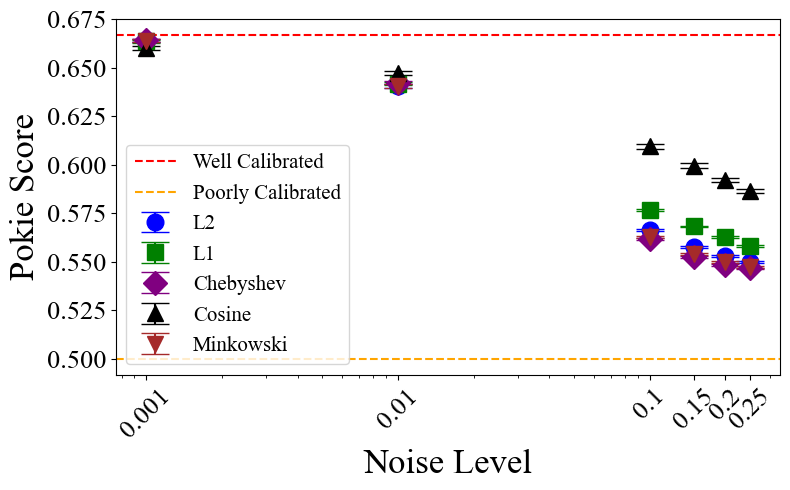

In [51]:
# Table Dist_Metric_Comp
noise_levels = [0.001, 0.010, 0.100, 0.150, 0.200, 0.250]

# Scores and 68% CI errors for each metric
metrics = {
    "L2":        ([0.6640, 0.6405, 0.5660, 0.5574, 0.5528, 0.5497], [0.0007, 0.0009, 0.0005, 0.0004, 0.0004, 0.0004]),
    "L1":        ([0.6636, 0.6417, 0.5764, 0.5681, 0.5624, 0.5580], [0.0008, 0.0007, 0.0005, 0.0004, 0.0005, 0.0004]),
    "Chebyshev": ([0.6640, 0.6422, 0.5617, 0.5524, 0.5484, 0.5464], [0.0007, 0.0007, 0.0006, 0.0005, 0.0005, 0.0004]),
    "Cosine":    ([0.6600, 0.6471, 0.6093, 0.5994, 0.5922, 0.5865], [0.0011, 0.0011, 0.0012, 0.0012, 0.0011, 0.0011]),
    "Minkowski": ([0.6639, 0.6404, 0.5625, 0.5539, 0.5498, 0.5474], [0.0007, 0.0009, 0.0006, 0.0004, 0.0005, 0.0005]),
}

# # Generate plots for each metric
# for metric, (scores, errors) in metrics.items():
#     plot_scores_with_error_bars(
#         x=noise_levels,
#         y=scores,
#         yerr=errors,
#         xlabel='Noise Level',
#         ylabel='Pokie Score',
#         table_number=f'Table_Dist_Metric_{metric}',
#         title=f'Pokie Score vs Noise Level ({metric} Distance)'
#     )


# Marker styles for differentiation
markers = ['o', 's', 'D', '^', 'v']
colors = ['blue', 'green', 'purple', 'black', 'brown']

# Create the combined plot
plt.figure(figsize=(8, 5))
for (metric, (scores, errors)), marker, color in zip(metrics.items(), markers, colors):
    plt.errorbar(
        noise_levels, scores, yerr=errors,
        fmt=marker, capsize=10, label=metric,
        markersize=12, color=color
    )

# Reference lines
plt.axhline(2/3, color='red', linestyle='--', label='Well Calibrated')
plt.axhline(1/2, color='orange', linestyle='--', label='Poorly Calibrated')

# Labels, title, and legend
plt.xlabel('Noise Level', fontsize=25)
plt.ylabel('Pokie Score', fontsize=25)

plt.xticks(fontsize=23)
plt.yticks(fontsize=19)

# Custom x-tick labels
plt.xscale('log')  # Log spacing for better visual separation
noise_levels = [0.001, 0.010, 0.100, 0.150, 0.200, 0.250]
xtick_labels=['0.001', '0.01', '0.1', '0.15', '0.2', '0.25']  # <- manually override
plt.xticks(ticks=noise_levels, labels=xtick_labels, rotation=45, fontsize=19)

plt.legend(loc='lower left', fontsize=15)

plt.tight_layout()
plt.savefig('./PNG_Plots/Table_Dist_Metric_Comparison_plot.png', dpi=300)
plt.savefig('./PDF_Plots/Table_Dist_Metric_Comparison_plot.pdf')
plt.show()

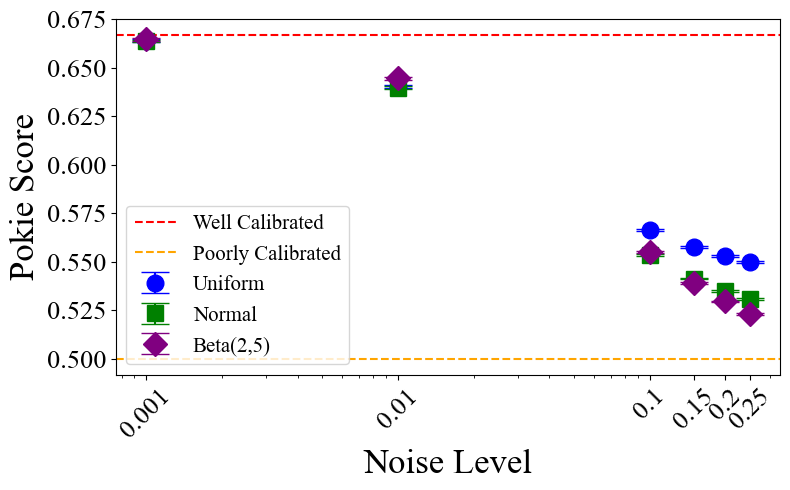

In [52]:
# Table Distribution_Choice
noise_levels = [0.001, 0.010, 0.100, 0.150, 0.200, 0.250]

# Scores and 68% CI errors for each center distribution
distributions = {
    "Uniform":    ([0.6637, 0.6402, 0.5660, 0.5574, 0.5528, 0.5498], [0.0008, 0.0010, 0.0005, 0.0004, 0.0004, 0.0004]),
    "Normal":     ([0.6636, 0.6396, 0.5532, 0.5412, 0.5348, 0.5305], [0.0007, 0.0009, 0.0005, 0.0004, 0.0004, 0.0005]),
    "Beta(2,5)":  ([0.6645, 0.6445, 0.5550, 0.5389, 0.5294, 0.5229], [0.0006, 0.0007, 0.0005, 0.0005, 0.0005, 0.0004]),
}

# Marker styles for differentiation
markers = ['o', 's', 'D']
colors = ['blue', 'green', 'purple']

# Create the combined plot
plt.figure(figsize=(8, 5))
for (dist_label, (scores, errors)), marker, color in zip(distributions.items(), markers, colors):
    plt.errorbar(
        noise_levels, scores, yerr=errors,
        fmt=marker, capsize=10, label=dist_label,
        markersize=12, color=color
    )

# Reference lines
plt.axhline(2/3, color='red', linestyle='--', label='Well Calibrated')
plt.axhline(1/2, color='orange', linestyle='--', label='Poorly Calibrated')

# Labels, title, and legend
plt.xlabel('Noise Level', fontsize=25)
plt.ylabel('Pokie Score', fontsize=25)

plt.xticks(fontsize=23)
plt.yticks(fontsize=19)

# Custom x-tick labels
plt.xscale('log')  # Log spacing for better visual separation
noise_levels = [0.001, 0.010, 0.100, 0.150, 0.200, 0.250]
xtick_labels=['0.001', '0.01', '0.1', '0.15', '0.2', '0.25']  # <- manually override
plt.xticks(ticks=noise_levels, labels=xtick_labels, rotation=45, fontsize=19)
    
# plt.title('Pokie Score vs Noise Level for Various Distance Metrics', fontsize=14)
plt.legend(loc='lower left', fontsize=15)

plt.tight_layout()
plt.savefig('./PNG_Plots/Table_Distribution_Comparison_plot.png', dpi=300)
plt.savefig('./PDF_Plots/Table_Distribution_Comparison_plot.pdf')
plt.show()

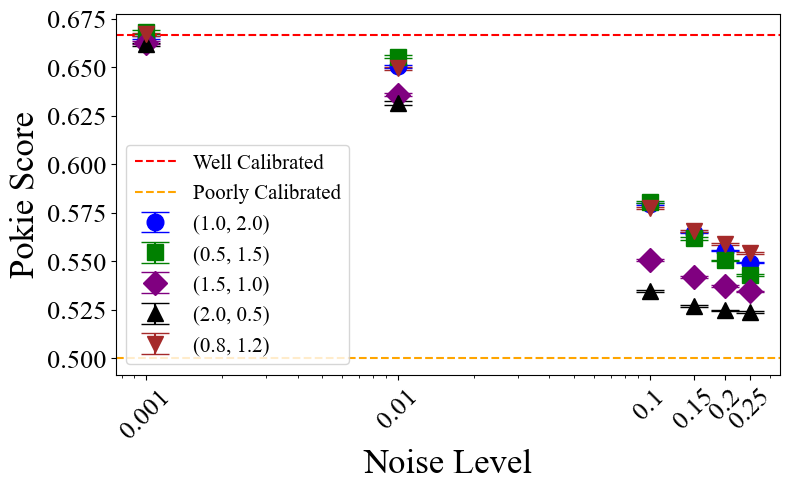

In [53]:
# Table Region_Choice (Ellipse Stretch Configurations)
noise_levels = [0.001, 0.010, 0.100, 0.150, 0.200, 0.250]

# Scores and errors by ellipse stretch configuration
ellipse_configs = {
    "(1.0, 2.0)": ([0.6653, 0.6504, 0.5795, 0.5647, 0.5555, 0.5492], [0.0009, 0.0008, 0.0004, 0.0003, 0.0003, 0.0003]),
    "(0.5, 1.5)": ([0.6681, 0.6554, 0.5805, 0.5619, 0.5504, 0.5430], [0.0009, 0.0009, 0.0007, 0.0007, 0.0005, 0.0005]),
    "(1.5, 1.0)": ([0.6627, 0.6358, 0.5508, 0.5417, 0.5372, 0.5345], [0.0007, 0.0009, 0.0006, 0.0005, 0.0005, 0.0004]),
    "(2.0, 0.5)": ([0.6618, 0.6317, 0.5347, 0.5270, 0.5247, 0.5239], [0.0009, 0.0010, 0.0006, 0.0004, 0.0004, 0.0005]),
    "(0.8, 1.2)": ([0.6669, 0.6494, 0.5773, 0.5657, 0.5590, 0.5543], [0.0008, 0.0008, 0.0006, 0.0005, 0.0004, 0.0004]),
}

# Marker styles for differentiation
markers = ['o', 's', 'D', '^', 'v']
colors = ['blue', 'green', 'purple', 'black', 'brown']

# Create the combined plot
plt.figure(figsize=(8, 5))
for (config_label, (scores, errors)), marker, color in zip(ellipse_configs.items(), markers, colors):
    plt.errorbar(
        noise_levels, scores, yerr=errors,
        fmt=marker, capsize=10, label=config_label,
        markersize=12, color=color
    )

# Reference lines
plt.axhline(2/3, color='red', linestyle='--', label='Well Calibrated')
plt.axhline(1/2, color='orange', linestyle='--', label='Poorly Calibrated')

# Labels, title, and legend
plt.xlabel('Noise Level', fontsize=25)
plt.ylabel('Pokie Score', fontsize=25)

plt.xticks(fontsize=23)
plt.yticks(fontsize=19)

# Custom x-tick labels
plt.xscale('log')  # Log spacing for better visual separation
noise_levels = [0.001, 0.010, 0.100, 0.150, 0.200, 0.250]
xtick_labels=['0.001', '0.01', '0.1', '0.15', '0.2', '0.25']  # <- manually override
plt.xticks(ticks=noise_levels, labels=xtick_labels, rotation=45, fontsize=19)
    
# plt.title('Pokie Score vs Noise Level for Various Distance Metrics', fontsize=14)
plt.legend(loc='lower left', fontsize=15)

plt.tight_layout()
plt.savefig('./PNG_Plots/Table_Ellipse_Comparison_plot.png', dpi=300)
plt.savefig('./PDF_Plots/Table_Ellipse_Comparison_plot.pdf')
plt.show()

In [54]:
# Redo Sensitivity Test Plots

In [ ]:
lr_10_posteriors = [
    (0.6498, 0.01825),
    (0.6235, 0.0192),
    (0.5598, 0.0100),
    (0.5546, 0.0105),
    (0.5510, 0.0092),
    (0.5469, 0.00915),
]

lr_50_posteriors = [
    (0.6684, 0.0072),
    (0.6480, 0.00785),
    (0.5702, 0.0060),
    (0.5601, 0.0044),
    (0.5546, 0.0040),
    (0.5500, 0.00435),
]

lr_100_posteriors = [
    (0.6647, 0.00194),
    (0.6353, 0.00246),
    (0.5590, 0.00131),
    (0.5548, 0.00122),
    (0.5526, 0.00130),
    (0.5489, 0.00112),
]

lr_500_posteriors = [
    (0.6641, 0.00195),
    (0.6403, 0.00245),
    (0.5665, 0.00135),
    (0.5578, 0.00125),
    (0.5528, 0.00135),
    (0.5499, 0.00115),
]

lr_1000_posteriors = [
    (0.6633, 0.0018),
    (0.6404, 0.0020),
    (0.5660, 0.00105),
    (0.5576, 0.00105),
    (0.5531, 0.0009),
    (0.5498, 0.00085),
]

posteriors = {
    "LR=10": lr_10_posteriors,
    "LR=50": lr_50_posteriors,
    "LR=100": lr_100_posteriors,
    "LR=500": lr_500_posteriors,
    "LR=1000": lr_1000_posteriors,
}

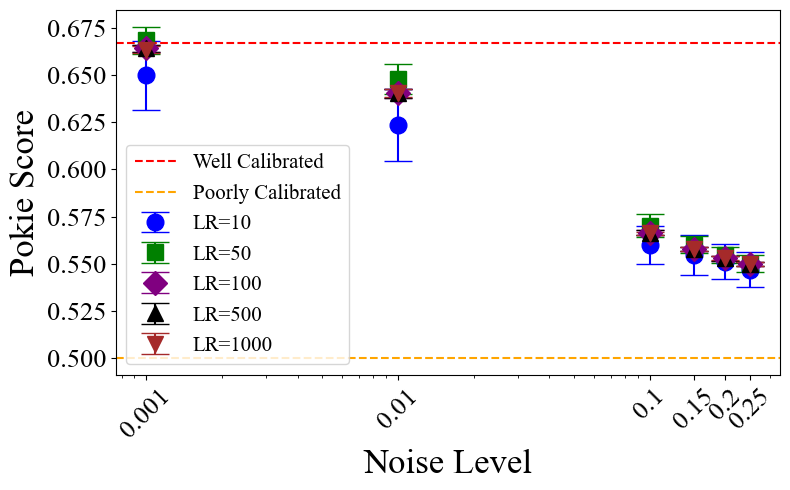

In [56]:
# noise_levels = [0.001, 0.010, 0.100, 0.150, 0.200, 0.250]


# # Dictionary for easy plotting
# posteriors = {
#     "10 True Samples": lr_10_posteriors,
#     "50 True Samples": lr_50_posteriors,
#     "100 True Samples": lr_100_posteriors,
#     "500 True Samples": lr_500_posteriors,
#     "1000 True Samples": lr_1000_posteriors
# }

# # Plotting
# plt.figure(figsize=(20, 16))
# plt.axhline(y=2/3, color='red', linestyle='--', label='Well Calibrated Limit')
# plt.axhline(y=1/2, color='blue', linestyle='--', label='Poorly Calibrated Limit')
# for label, data in posteriors.items():
#     means = [x[0] for x in data]
#     sigmas = [x[1] for x in data]
#     means = np.array(means)
#     sigmas = np.array(sigmas)
#     plt.plot(noise_levels, means, 'o-', label=label, markersize=22)
#     plt.fill_between(noise_levels, means - sigmas, means + sigmas, alpha=0.2)
# # Make x ticks larger
# plt.xticks(fontsize=30)
# plt.yticks(fontsize=30)
# plt.xlabel("Noise Level", fontsize=34)
# plt.ylabel("Pokie Score", fontsize=34)
# # plt.title("Varying Posterior Samples", fontsize=40)
# plt.legend(loc='upper right', fontsize=32)
# plt.tight_layout()
# plt.savefig('./Plots/LR_pokie_scores_vs_noise.png', dpi=300, bbox_inches='tight')
# plt.savefig('./Plots/LR_pokie_scores_vs_noise.pdf', dpi=300, bbox_inches='tight')
# plt.show()

def plot_multiple_scores_with_confidence_intervals(
    x,
    data_dict,
    xlabel='Noise Level',
    ylabel='Pokie Score',
    xtick_labels=None,
    xtick_rotation=0,
    log_x=False,
    table_number=None,
    bbox_x=1.02,
    bbox_y=0.72,
    fig_size=(10, 6)
):
    import matplotlib.pyplot as plt
    import numpy as np

    plt.figure(figsize=fig_size)

    markers = ['o', 's', 'D', '^', 'v']
    colors = ['blue', 'green', 'purple', 'black', 'brown']

    # Plot each curve
    for label, values in data_dict.items():
        means = np.array([v[0] for v in values])
        errors = np.array([v[1] for v in values])

        plt.errorbar(
            x, means, yerr=errors,
            label=label,
            fmt=markers.pop(0), capsize=10, markersize=12, color=colors.pop(0)
        )

        # plt.fill_between(x, means - errors, means + errors, alpha=0.15)

    # Reference lines
    plt.axhline(y=2/3, color='red', linestyle='--', label='Well Calibrated')
    plt.axhline(y=1/2, color='orange', linestyle='--', label='Poorly Calibrated')

    # Axes styling
    plt.xlabel(xlabel, fontsize=25)
    plt.ylabel(ylabel, fontsize=25)
    plt.xticks(fontsize=23, rotation=xtick_rotation)
    plt.yticks(fontsize=19)

    # Log x if requested
    if log_x:
        plt.xscale('log')

    # Override x-tick labels
    if xtick_labels:
        plt.xticks(ticks=x, labels=xtick_labels, rotation=xtick_rotation, fontsize=19)

    # Legend
    plt.legend(loc='lower left', fontsize=15)
    plt.tight_layout()

    # Save if a table number is given
    filename_prefix = f'{table_number}_plot' if table_number else 'plot'
    plt.savefig(f'./PNG_Plots/{filename_prefix}.png', dpi=300)
    plt.savefig(f'./PDF_Plots/{filename_prefix}.pdf', dpi=300)
    plt.show()

plot_multiple_scores_with_confidence_intervals(
    x=noise_levels,
    data_dict=posteriors,
    xlabel='Noise Level',
    ylabel='Pokie Score',
    xtick_labels=['0.001', '0.01', '0.1', '0.15', '0.2', '0.25'],
    xtick_rotation=45,
    log_x=True,
    table_number='LR_pokie_scores_vs_noise',
    bbox_x=1.02,
    bbox_y=0.82,
    fig_size=(8, 5)
)

Size of models_name: 5
Size of multi_coil_mri_knee_data: 5


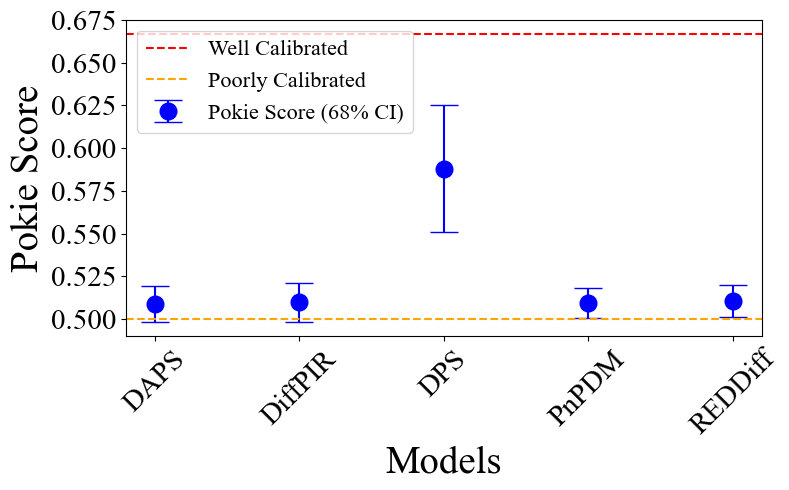

In [57]:
# Multi Coil MRI Knee LMDB Plots

daps_posterior = [(0.5088, 0.0105)]
diffpir_posterior = [(0.5098, 0.01125)]
dps_posterior = [(0.5880, 0.0370)]
pnpdm_posterior = [(0.5094, 0.00885)]
reddiff_posterior = [(0.5108, 0.0094)]

multi_coil_mri_knee_data = {
    "DAPS": daps_posterior,
    "DiffPIR": diffpir_posterior,
    "DPS": dps_posterior,
    "PnPDM": pnpdm_posterior,
    "REDDiff": reddiff_posterior,
}

models_name = ['DAPS', 'DiffPIR', 'DPS', 'PnPDM', 'REDDiff']

print(f'Size of models_name: {len(models_name)}')
print(f'Size of multi_coil_mri_knee_data: {len(multi_coil_mri_knee_data)}')

def plot_model_scores_barplot(
    data_dict,
    xlabel='Models',
    ylabel='Pokie Score',
    table_number=None,
    fig_size=(8, 5),
    xtick_rotation=45
):

    model_names = list(data_dict.keys())
    means = np.array([v[0][0] for v in data_dict.values()])
    errors = np.array([v[0][1] for v in data_dict.values()])

    plt.figure(figsize=fig_size)

    # bars = plt.bar(model_names, means, yerr=errors, capsize=10, color='skyblue', edgecolor='black')

    plt.errorbar(
        model_names, means, yerr=errors, fmt='o', capsize=10, color='blue',
        markersize=12, label=f'{ylabel} (68% CI)'
    )

    # Reference lines
    plt.axhline(y=2/3, color='red', linestyle='--', label='Well Calibrated')
    plt.axhline(y=1/2, color='orange', linestyle='--', label='Poorly Calibrated')

    # Axes styling
    plt.xlabel(xlabel, fontsize=28)
    plt.ylabel(ylabel, fontsize=28)
    plt.xticks(rotation=xtick_rotation, fontsize=21)
    plt.yticks(fontsize=21)

    # Legend
    plt.legend(loc='upper left', fontsize=16)
    plt.tight_layout()

    # Save if needed
    filename_prefix = f'{table_number}_plot'
    plt.savefig(f'./PNG_Plots/{filename_prefix}.png', dpi=300)
    plt.savefig(f'./PDF_Plots/{filename_prefix}.pdf', dpi=300)
    plt.show()

plot_model_scores_barplot(
    data_dict=multi_coil_mri_knee_data,
    xlabel='Models',
    ylabel='Pokie Score',
    table_number='Multi_Coil_MRI_Knee_Models',
    fig_size=(8, 5)
)

Size of models_name: 5
Size of multi_coil_mri_knee_data: 5


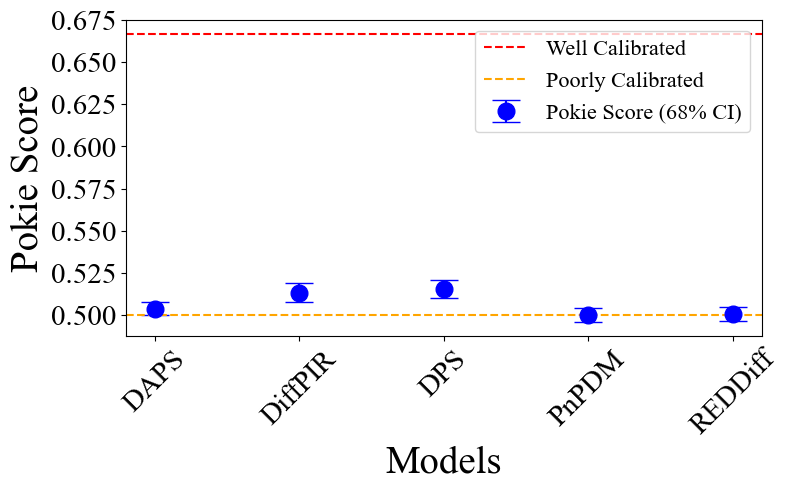

In [58]:
# Black Hole Imaging Plots

#   Model DPS: 0.5297 (+0.0032/-0.0029)
#   Model REDDiff: 0.5303 (+0.0028/-0.0023)
#   Model DiffPIR: 0.5298 (+0.0028/-0.0028)
#   Model PnPDM: 0.5299 (+0.0027/-0.0031)
#   Model DAPS: 0.5298 (+0.0027/-0.0032)

# Min Max Normalization
# dps_posterior = [(0.5297, 0.0032)]
# reddiff_posterior = [(0.5303, 0.0028)]
# diffpir_posterior = [(0.5298, 0.0028)]
# pnpdm_posterior = [(0.5299, 0.0027)]
# daps_posterior = [(0.5298, 0.0027)]

#   Model DPS: 0.5153 (+0.0054/-0.0055)
#   Model REDDiff: 0.5006 (+0.0041/-0.0043)
#   Model DiffPIR: 0.5132 (+0.0057/-0.0047)
#   Model PnPDM: 0.5000 (+0.0041/-0.0036)
#   Model DAPS: 0.5037 (+0.0038/-0.0035)

# Global Normalization
dps_posterior = [(0.5153, 0.0054)]
reddiff_posterior = [(0.5006, 0.0041)]
diffpir_posterior = [(0.5132, 0.0057)]
pnpdm_posterior = [(0.5000, 0.0041)]
daps_posterior = [(0.5037, 0.0038)]


multi_coil_mri_knee_data = {
    "DAPS": daps_posterior,
    "DiffPIR": diffpir_posterior,
    "DPS": dps_posterior,
    "PnPDM": pnpdm_posterior,
    "REDDiff": reddiff_posterior,
}

models_name = ['DAPS', 'DiffPIR', 'DPS', 'PnPDM', 'REDDiff']

print(f'Size of models_name: {len(models_name)}')
print(f'Size of multi_coil_mri_knee_data: {len(multi_coil_mri_knee_data)}')

def plot_model_scores_barplot(
    data_dict,
    xlabel='Models',
    ylabel='Pokie Score',
    table_number=None,
    fig_size=(8, 5),
    xtick_rotation=45
):

    model_names = list(data_dict.keys())
    means = np.array([v[0][0] for v in data_dict.values()])
    errors = np.array([v[0][1] for v in data_dict.values()])

    plt.figure(figsize=fig_size)

    # bars = plt.bar(model_names, means, yerr=errors, capsize=10, color='skyblue', edgecolor='black')

    plt.errorbar(
        model_names, means, yerr=errors, fmt='o', capsize=10, color='blue',
        markersize=12, label=f'{ylabel} (68% CI)'
    )

    # Reference lines
    plt.axhline(y=2/3, color='red', linestyle='--', label='Well Calibrated')
    plt.axhline(y=1/2, color='orange', linestyle='--', label='Poorly Calibrated')

    # Axes styling
    plt.xlabel(xlabel, fontsize=28)
    plt.ylabel(ylabel, fontsize=28)
    plt.xticks(rotation=xtick_rotation, fontsize=21)
    plt.yticks(fontsize=21)

    # Legend
    plt.legend(loc='upper right', fontsize=16)
    plt.tight_layout()

    # Save if needed
    filename_prefix = f'{table_number}_plot'
    plt.savefig(f'./PNG_Plots/{filename_prefix}.png', dpi=300)
    plt.savefig(f'./PDF_Plots/{filename_prefix}.pdf', dpi=300)
    plt.show()

plot_model_scores_barplot(
    data_dict=multi_coil_mri_knee_data,
    xlabel='Models',
    ylabel='Pokie Score',
    table_number='Black_Hole_Imaging_Models',
    fig_size=(8, 5)
)

In [59]:
import os
# print curr working directory
print(os.getcwd())

/Users/sammysharief/Downloads/ICLR_2026_Plots


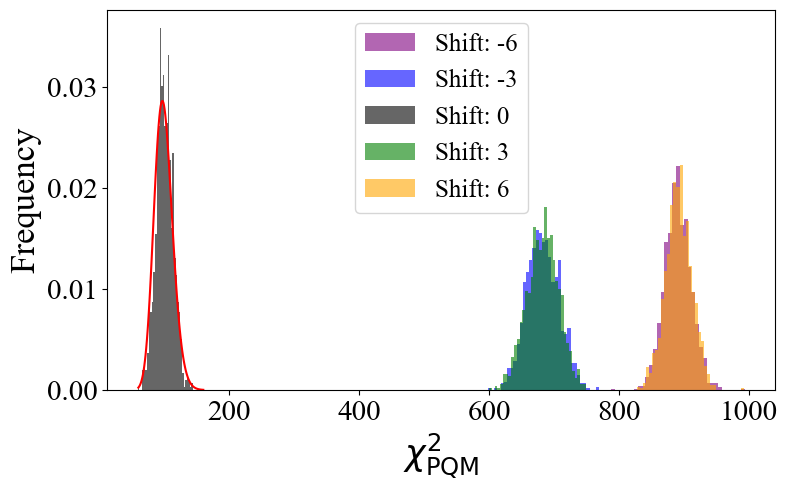

In [60]:
# GMM PQMass Plot
'''
Shift -6: PQMass chi2 = 8422.474194293038 ± 55.918322895763744
Shift -3: PQMass chi2 = 7053.060785111303 ± 94.01420888659344
Shift 0: PQMass chi2 = 99.78600647229041 ± 10.553712444309584
Shift 3: PQMass chi2 = 7067.914848383686 ± 87.71348027725851
Shift 6: PQMass chi2 = 8469.945279412974 ± 58.82982787514194
'''
from scipy.stats import norm, chi2, uniform

pqmass_shift_neg6 = np.load('./GMM_PQMass/shift_neg_6.npz')
pqmass_shift_neg3 = np.load('./GMM_PQMass/shift_neg_3.npz')
pqmass_shift_0 = np.load('./GMM_PQMass/shift_zero.npz')
pqmass_shift_3 = np.load('./GMM_PQMass/shift_pos_3.npz')
pqmass_shift_6 = np.load('./GMM_PQMass/shift_pos_6.npz')

zs_neg6 = pqmass_shift_neg6['zs']
zs_neg3 = pqmass_shift_neg3['zs']
zs_0    = pqmass_shift_0['zs']
zs_3    = pqmass_shift_3['zs']
zs_6    = pqmass_shift_6['zs']

# Combine all zs_neg6 into one list
zs_neg6_combined = np.concatenate(zs_neg6)
zs_neg3_combined = np.concatenate(zs_neg3)
zs_0_combined = np.concatenate(zs_0)
zs_3_combined = np.concatenate(zs_3)
zs_6_combined = np.concatenate(zs_6)

pqmass_list = [zs_neg6_combined, zs_neg3_combined, zs_0_combined, zs_3_combined, zs_6_combined]


fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(zs_neg6_combined, bins=35, density=True, label = 'Shift: -6', color='purple', alpha=0.6)
ax.hist(zs_neg3_combined, bins=35, density=True, label = 'Shift: -3', color='blue', alpha=0.6)
ax.hist(zs_0_combined, bins=35, density=True, label = 'Shift: 0', color='black', alpha=0.6)
ax.hist(zs_3_combined, bins=35, density=True, label = 'Shift: 3', color='green', alpha=0.6)
ax.hist(zs_6_combined, bins=35, density=True, label = 'Shift: 6', color='orange', alpha=0.6)
ax.plot(np.linspace(60, 160, 100), chi2.pdf(np.linspace(60, 160, 100), df=99), color='red')
ax.set_xlabel(r'$\chi^2_{{\rm PQM}}$', fontsize=25)
ax.set_ylabel('Frequency', fontsize=25)
ax.tick_params(axis='both', labelsize=21)
# ax.legend(loc='upper right', fontsize=15)
ax.legend(fontsize=18)
plt.tight_layout()
plt.savefig('./PNG_Plots/GMM_PQMass_Shift_Comparison_plot.png', dpi=300)
plt.savefig('./PDF_Plots/GMM_PQMass_Shift_Comparison_plot.pdf', dpi=300)
plt.show()